In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab2_Files/'
path='/content/gdrive/My Drive/CMPUT 206 Wi19/Lab2_Files/'
filename_noisy = path +'noisy.jpg'
filename_mask = path +'damage_mask.bmp'
filename_damaged = path +'damaged_cameraman.bmp'


 damaged_cameraman.bmp	'lab2_part1&2.ipynb'   noisy.jpg
 damage_mask.bmp	 lab2_part3.ipynb      test.jpg


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.signal import convolve2d as conv2
import os
import skimage
from skimage import img_as_ubyte
from skimage.color import rgb2gray

1.0 0.0
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


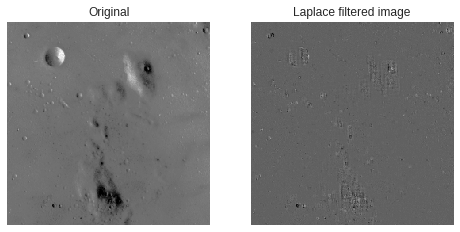

In [8]:
filename = os.path.join(skimage.data_dir, 'moon.png')
img = io.imread(filename,as_grey=True)

# normalizing image between 0 and 1
img = (img - np.amin(img))/(np.amax(img)- np.amin(img))

# check the max and min values
print(np.amax(img), np.amin(img))

# building filter (kernel)
kernel = -np.ones((3,3),np.float32)
kernel[1][1] = 8
print(kernel)
#applying filter
dst = conv2( img,kernel, 'same')

# normalizing filtered image between 0 and 1
dst = (dst - np.amin(dst))/(np.amax(dst)- np.amin(dst))


plt.subplot(121),plt.imshow(img, cmap='gray', vmin = 0, vmax = 1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap='gray', vmin = 0, vmax = 1),plt.title('Laplace filtered image')
plt.xticks([]), plt.yticks([])

plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]] 

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]] 

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]] 

average filter is: 

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]] 

[[0.82767755 0.38192144 0.52133779 ... 0.40965066 0.40965066 0.44331979]
 [0.62378184 0.35606595 0.50395511 ... 0.35914698 0.35914698 0.40965066]
 [0.35727325 0.3237152  0.44233463 ... 0.36145774 0.36145774 0.41119117]
 ...
 [0.4596486  0.53298075 0.47906282 ... 0.48569835 0.39480814 0.46413118]
 [0.41189272 0.49292743 0.45980642 ... 0.48954963 0.39403788 0.47568502]
 [0.46647568 0.45117578 0.38031222 ... 0.50033321 0.46644195 0.53345422]] 



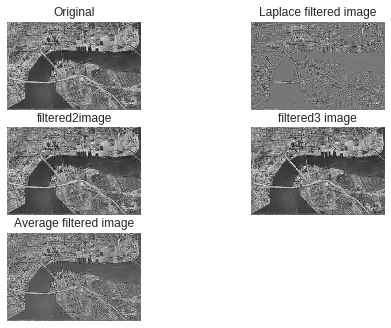

In [9]:
#part1

test = path + 'test.jpg'
img = io.imread(test, as_grey=True)
img = rgb2gray(img)
img_ubyte = skimage.img_as_ubyte(img, force_copy= False)

#normalization the image
img_eq = (img - np.amin(img))/(np.amax(img)-np.amin(img))

#build 3x3 matrix filter
matrix = -np.ones((3,3),np.float32) 
#float32-> Single precision float, (3,3 )is 3 array with 3 elements\
matrix[1][1] = 8
print(matrix ,"\n") #check

#create filters
def filter():
  matrix =np.zeros([3,3])
  return matrix
 
filter1 =filter()
filter1[1][1] += 1
print(filter1,"\n")


filter2 = filter()
filter2[1][2] += 1
print(filter2,"\n")

#calculate average filter
matrix1 = np.ones([3,3])
avg_filter = (1/9)*matrix1
print('average filter is: \n')
print(avg_filter,'\n')

#applying filter
dst = conv2(img_eq, matrix, 'same')
dst2 = conv2(img_eq, filter1, 'same')
dst3 = conv2(img_eq, filter2, 'same')

#compute Im + (Im - Im*average_filter) #where * is a convolution operation
dst4 = img_eq +(img_eq - conv2(img_eq,avg_filter, 'same')) 


# normalizing filtered image between 0 and 1
dst = (dst - np.amin(dst))/(np.amax(dst)- np.amin(dst))
dst2 = (dst2 - np.amin(dst2))/(np.amax(dst2)- np.amin(dst2))
dst3 = (dst3 - np.amin(dst3))/(np.amax(dst3)- np.amin(dst3))
dst4 = (dst4 - np.amin(dst4))/(np.amax(dst4)- np.amin(dst4))

print(dst4,'\n')

plt.subplot(321),plt.imshow(img_eq, cmap='gray', vmin = 0, vmax = 1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(dst, cmap='gray', vmin = 0, vmax = 1),plt.title('Laplace filtered image')
plt.xticks([]), plt.yticks([])

plt.subplot(323),plt.imshow(dst2, cmap='gray', vmin = 0, vmax = 1),plt.title('filtered2image')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(dst3, cmap='gray', vmin = 0, vmax = 1),plt.title('filtered3 image')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(dst4, cmap='gray', vmin = 0, vmax = 1),plt.title('Average filtered image')
plt.xticks([]), plt.yticks([])


plt.show()





/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


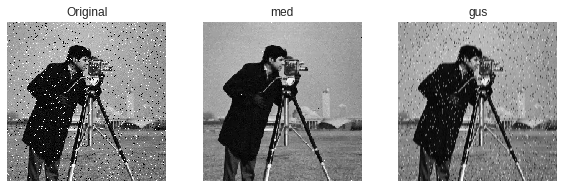

In [11]:
from skimage.morphology import disk
from skimage.filters import median
#part2 with skimage
from skimage.filters import gaussian

img = io.imread(filename_noisy,as_grey=True)
#normalization the image
img_eq = (img - np.amin(img))/(np.amax(img)-np.amin(img))

med_img = median(img_eq,disk(1))
gus_img = gaussian(img_eq, sigma=1, multichannel=True)

#plot 3 graphs

plt.subplot(131), io.imshow(img_eq,cmap='gray', vmin = 0, vmax = 1), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), io.imshow(med_img), plt.title('med')
plt.xticks([]), plt.yticks([])
plt.subplot(133), io.imshow(gus_img,cmap='gray', vmin = 0, vmax = 1), plt.title('gus')
plt.xticks([]), plt.yticks([])
plt.show()



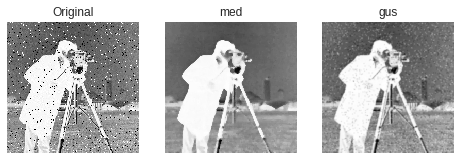

In [14]:
#part2 with cv
import cv2
import numpy as np
from matplotlib import pyplot as plt


from skimage.morphology import disk
from skimage.filters import median

img = io.imread(filename_noisy,as_grey=True)
#normalization the image
img_eq = (img - np.amin(img))/(np.amax(img)-np.amin(img))

med_img = cv2.medianBlur(img, 5)
gus_img = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(131), plt.imshow(img_eq), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(med_img), plt.title('med')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gus_img), plt.title('gus')
plt.xticks([]), plt.yticks([])
plt.show()
